### Imports and Libraries

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd
import os
import sys
import ast
import geopandas as gpd
import numpy as np

# Add the src directory to the system path
sys.path.append(os.path.abspath('../src'))

from utils import *

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
#from dataset.character import CharacterDataset
#from dataset.event import EventDataset

In [ ]:
from pathlib import Path
from tqdm import tqdm
import json
from collections import Counter, defaultdict
import gc
from wordcloud import WordCloud

# Data exploration

In our project, we aim to explore the evolution of stereotypical gender personas over time. Before addressing our specific research questions, we recognize the importance of thoroughly understanding the dataset we’re working with. This initial exploratory phase serves several essential purposes:

1. Dataset Familiarization: Begin by examining the overall structure, types of variables, and categories within the data to gain a clear understanding of its scope and content.

2. Data Integrity Check: Evaluate the dataset for potential quality issues such as missing values, duplicates, and outliers, ensuring that the information is reliable and accurate for analysis.

3. Initial Insights: Explore patterns, distributions, and basic relationships within the data to reveal any trends, outliers, or unexpected characteristics that could shape further analysis.

4. Analytical Approach Selection: Use findings from the preliminary exploration to refine our methodological approach, identifying the most suitable tools and techniques for in depth analysis.

5. Hypothesis Discovery: Develop new questions or hypotheses based on early insights, potentially expanding the original focus of our research.

6. Dataset Preparation: Apply necessary data transformations and manipulations to prepare a clean, organized dataset ready for focused analysis.

In [ ]:
# Loading the data using the according function for each file in utils.py
file_path = "../../MovieSummaries"

print("Dataframes creation starting for CMU datasets...")

df_summaries = load_df_summaries(file_path)
df_movie_metadata = load_df_movies(file_path)
df_character_metadata = load_df_characters(file_path)
df_tvtropes_clusters = load_df_character_clusters(file_path)

print("Dataframes creation for CMU datasets done.")

Dataframes creation starting for CMU datasets...
Dataframes creation for CMU datasets done.


## 1 Visualization in order to understand the data

### 1.1 Visualization of each dataframe and size of each dataframe

In [ ]:
df_summaries.head()

,wiki_movie_id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [ ]:
df_movie_metadata.head()

,wiki_movie_id,freebase_movie_id,title,release_date,box_office,runtime,languages,countries,genres,Movie_release_date
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",2001-08-24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",2000-02-16
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"[Crime Fiction, Drama]",NaT
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaT
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,[Drama],NaT


In [ ]:
df_character_metadata.head()

,wiki_movie_id,freebase_movie_id,release_date,character_name,birth_date,gender,height,ethnicity,actor_name,age_at_release,freebase_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [ ]:
df_tvtropes_clusters.head()

,cluster,character_name,movie_title,freebase_map_id,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [ ]:
# Size of the df_character_metadata
characters_df_size=len(df_character_metadata)
print(f'The size of the characters_df is: {characters_df_size}')

# Size of the df_movie_metadata
movies_df_size=len(df_movie_metadata)
print(f'The size of the movies_df is: {movies_df_size}')

# Size of the summaries df
summaries_df_size=len(df_summaries)
print(f'The size of the summaries_df is: {summaries_df_size}')

# Size of the tv_tropes_df
tv_tropes_df_size=len(df_tvtropes_clusters)
print(f'The size of the tv_tropes_df is: {tv_tropes_df_size}')

The size of the characters_df is: 450669
The size of the movies_df is: 81741
The size of the summaries_df is: 42303
The size of the tv_tropes_df is: 501


### 1.2 General exploration of genders' representation in movies

In [ ]:
# Check how many characters do not have specified gender
df_character_metadata['gender'].isna().value_counts()

gender
False    405060
True      45609
Name: count, dtype: int64

It seems like a little over 10% of the characters given, do not have a specified gender. As it is not a big percentage, we will continue our analysis with the characters with a specified gender.

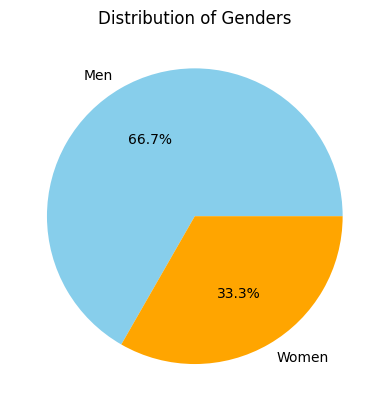

In [ ]:
# Count of characters by gender
gender_counts = df_character_metadata['gender'].value_counts()
men_count = gender_counts["M"]
women_count = gender_counts["F"]

# Plot value counts as pie chart
plt.pie([men_count, women_count], labels=["Men", "Women"],  colors=['skyblue', 'orange'], autopct='%1.1f%%')
plt.title('Distribution of Genders')
plt.ylabel('')
plt.show()

The number of male characters is two times bigger than the number of female characters, but let's still verify that there is a statistical difference.

In [ ]:
# Run T-test in order to see if there is statistical difference between the total number of men and women
is_female = np.array(df_character_metadata['gender'] == 'F', dtype=int)
is_male = np.array(df_character_metadata['gender'] == 'M', dtype=int)
pvalue = ttest_ind(is_female, is_male).pvalue
print(f"P-value = {pvalue}")

P-value = 0.0


P-value is zero, meaning that male and female characters were sampled from uniform distribution with zero probability.

So, as expected, male characters surpass the amount of female characters. This is a first sign of the stronger representation of males in movies.

### 1.3 Difference in males VS. females representation, across time

Let's look at the number of male and female characters for each decade.

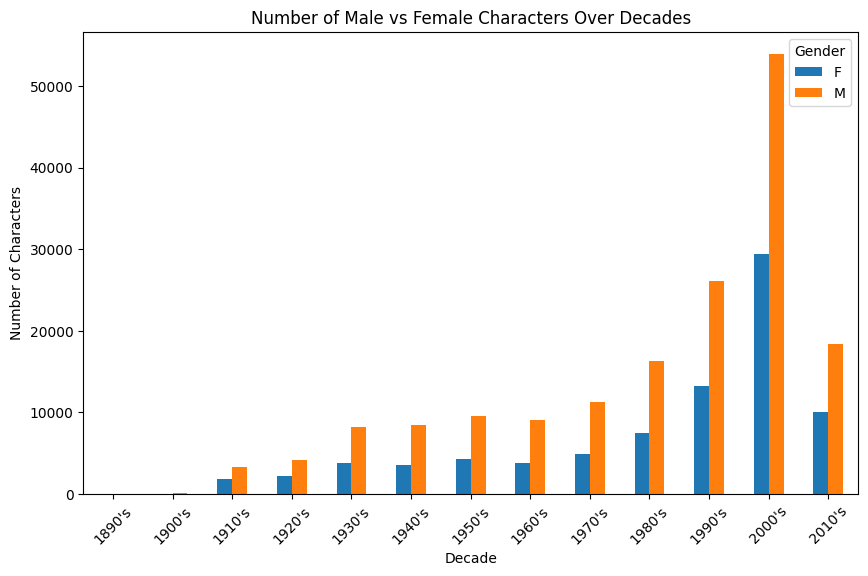

In [ ]:
# Extracting the decade
df_character_metadata['decade'] = (df_character_metadata['release_date'].dt.year // 10) * 10

# Counting males and females per decade
gender_counts = df_character_metadata.groupby(['decade', 'gender']).size().unstack(fill_value=0)
gender_counts = gender_counts.set_index(gender_counts.index.map(lambda x: str(int(x))+ "'s"))

# Plotting
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title("Number of Male vs Female Characters Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Characters")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.show()

At first glance, we notice the same trend over the decades: males' representation in movies remains dominant.

In addition to that, the number of movie characters greatly increases from the beginning of 20th century to the most recent data we have. For this reason, from now on we will consider the ratios of men and women instead of the absolute values.   

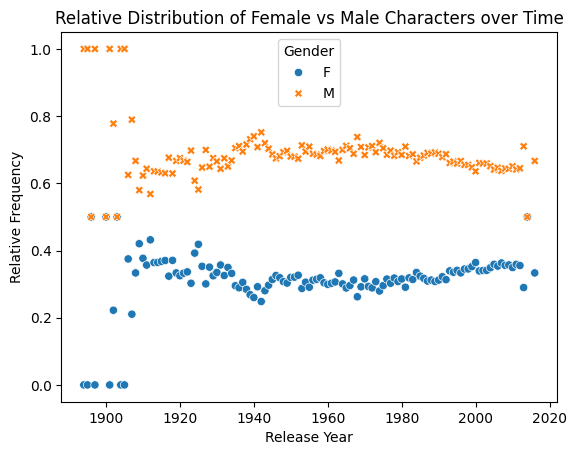

In [ ]:
# Line plot of relative proportion of women characters with time
df_character_metadata['year'] = df_character_metadata['release_date'].dt.year
gender_counts = df_character_metadata.groupby(['year', 'gender']).size().unstack(fill_value=0)
rel_freq = gender_counts.div(gender_counts.sum(axis=1), axis=0)

plt.figure()
sns.scatterplot(data=rel_freq)
plt.title('Relative Distribution of Female vs Male Characters over Time')
plt.xlabel('Release Year')
plt.ylabel('Relative Frequency')
plt.legend(title='Gender', loc='upper center')
plt.show()

Is the ratio of men constant throughout the years? Let's verify this by running linear regression:
$Male\ ratio ~= \alpha * year + \beta$.

<Axes: xlabel='Year', ylabel='Male Ratio'>

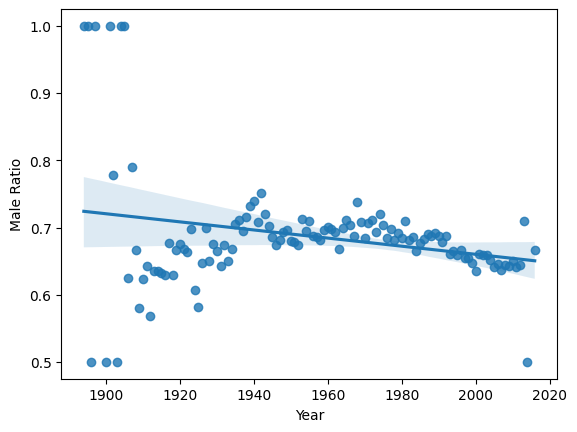

In [ ]:
df = pd.DataFrame(data={"Year": gender_counts.index, "Male Ratio": rel_freq["M"]})
sns.regplot(data=df, x="Year", y="Male Ratio", order=1)

It seems like the trend of higher male representation has slightly changed through the years, as shown in the plot above. The ratio of males seems to decrease a little, but the variance is getting higher to the end of the tine interval, so we cannot conclude with confidence that the percentage of men will reduce in the following years.

### 1.4 Gender representation across countries

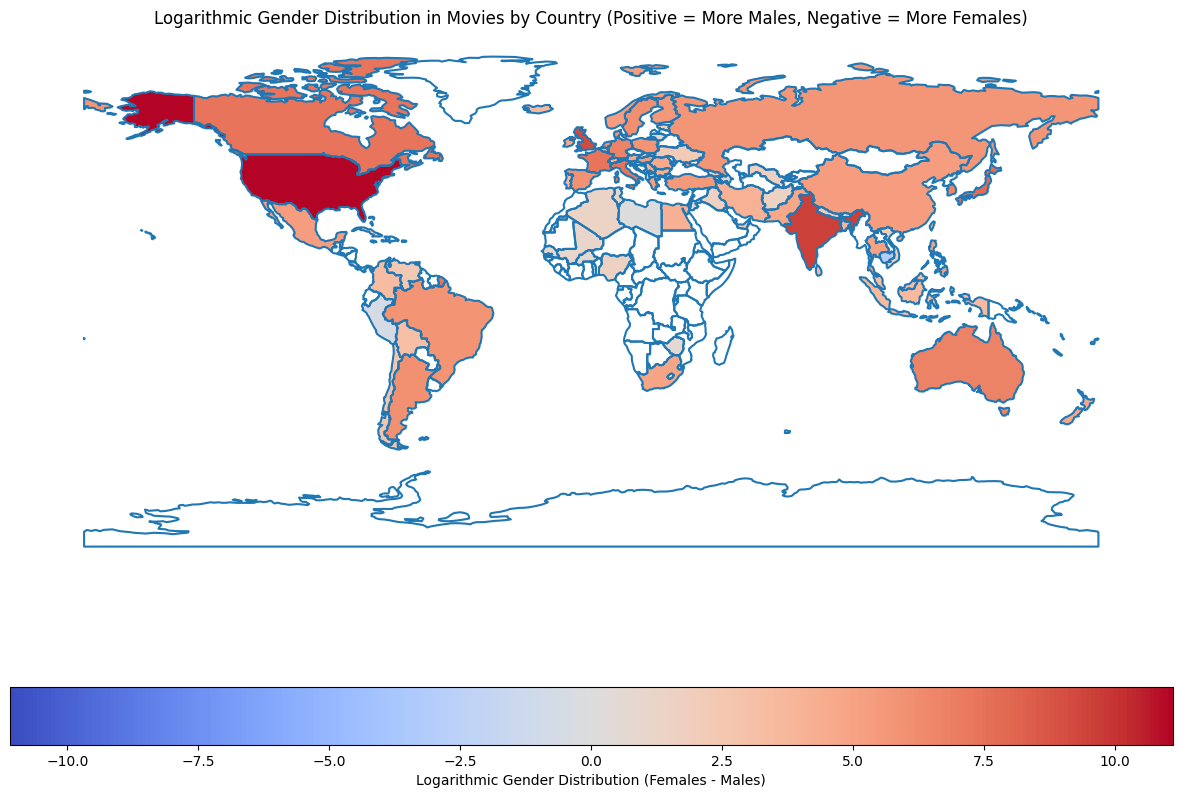

In [ ]:
# Merge DataFrames on 'wiki_movie_id'
merged_df = df_movie_metadata.merge(df_character_metadata, on="wiki_movie_id", how="inner")

# Count the gender representation acorss countries
gender_counts = merged_df.groupby(['countries', 'gender']).size().unstack(fill_value=0)
gender_counts.columns = ['F', 'M']
gender_counts['Difference'] = gender_counts['M'] - gender_counts['F']  # Positive if more males, negative if more females
gender_counts.reset_index(inplace=True)

# Load the world shapefile
shapefile_path = '../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'  # Adjust this path based on folder structure
world = gpd.read_file(shapefile_path)

world = world.merge(gender_counts, how='left', left_on='NAME', right_on='countries')

# Apply logarithmic transformation to the absolute value of `Difference`
world['Log_Difference'] = np.sign(world['Difference']) * np.log1p(world['Difference'].abs())

# Set up symmetrical limits based on the transformed values
max_abs_log_diff = world['Log_Difference'].abs().max()

# Plot the transformed `Log_Difference` values
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Log_Difference', cmap='coolwarm', ax=ax, legend=True,
           vmin=-max_abs_log_diff, vmax=max_abs_log_diff,
           legend_kwds={'label': "Logarithmic Gender Distribution (Females - Males)",
                        'orientation': "horizontal"},
           missing_kwds={'color': 'white'},  # Set missing data color to white
           linewidth=0.5, edgecolor='0.5')

plt.title('Logarithmic Gender Distribution in Movies by Country (Positive = More Males, Negative = More Females)')
plt.axis('off')
plt.show()

In [ ]:
df_US = merged_df[merged_df['countries'] == "United States of America"]
print(f" {len(df_US)} out of the {len(merged_df)} characters come from movies in the United States of America.")

 203805 out of the 450669 characters come from movies in the United States of America.


In [ ]:
df_Peru = gender_counts[gender_counts['countries'] == "Peru"]
print(df_Peru)

     countries   F   M  Difference
1022      Peru  11  10          -1


In [ ]:
df_Libya = gender_counts[gender_counts['countries'] == "Libya"]
print(df_Libya)

    countries  F  M  Difference
934     Libya  4  4           0


As shown in the map above, all countries are visibly red (or close to red), which means that the percentage of men is higher than women's. Only a few countries such as Peru and Libya appear to have balanced amount of male and female characters.

Countries that are represented with white color, did not have any Movie characters associated with them.

Almost half of the characters come from movies in the USA, that's why we transformed the Difference of Male and Female Character to a logarithmic scale in order to be able to visualize clearly which gender dominates in each country.

### 1.5 Visualization of genders across movie genres

Now consider the top-10 most popular genres and analyze the number of men and women characters for each of them.

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'iframe'


merged_df = df_movie_metadata.explode('genres').merge(
    df_character_metadata,
    on='wiki_movie_id',
    how='inner'
)

# Add the Female-to-Male Ratio to the merged df
movie_gender_counts = merged_df.groupby(['wiki_movie_id', 'gender']).size().unstack(fill_value=0)
movie_gender_counts['Female_to_Male_Ratio'] = movie_gender_counts['F'] / (movie_gender_counts['M'] + movie_gender_counts['F'])
movie_gender_counts.reset_index(inplace=True)

merged_df = merged_df.merge(movie_gender_counts[['wiki_movie_id', 'Female_to_Male_Ratio']],
on='wiki_movie_id', how='left')

# Group by genres to calculate the average Female-to-Male Ratio for each genre
genre_avg_ratios = merged_df.groupby('genres')['Female_to_Male_Ratio'].mean()

# Get the top 10 genres by total characters
gender_genre_counts = merged_df.groupby(['genres', 'gender']).size().unstack(fill_value=0)
gender_genre_counts['Total'] = gender_genre_counts.sum(axis=1)
top_genres = gender_genre_counts.sort_values(by='Total',
ascending=False).head(10)

# Add the average Female-to-Male Ratio for each genre to the df
top_genres['Avg_Female_to_Male_Ratio'] = genre_avg_ratios[top_genres.index]

fig = go.Figure()

# Plot average Female-to-Male Ratio for top genres
fig.add_trace(go.Scatterpolar(
    r=top_genres['Avg_Female_to_Male_Ratio'],
    theta=top_genres.index,
    fill='toself',
    name='Avg Female-to-Male Ratio',
    line_color='purple'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            title='Count / Ratio'
        )
    ),
    showlegend=True,
    title='Top Genres: Average Female to Male ratio'
)

fig.show()

As before, the ratio of women is less than 0.5 for all of the popular genres. We also notice that for ''Romance Film'' the percentage is the highest, and for "action" it is the lowest.

In [ ]:
fig = go.Figure()

# Plot male counts for top genres
fig.add_trace(go.Scatterpolar(
    r=top_genres['M'],
    theta=top_genres.index,
    fill='toself',
    name='Males'
))

# Plot female counts for top genres
fig.add_trace(go.Scatterpolar(
    r=top_genres['F'],
    theta=top_genres.index,
    fill='toself',
    name='Females',
    line_color='orange'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            title='Count / Ratio'
        )
    ),
    showlegend=True,
    title='Top Genres: Count of Female and Male characters in the top 10 genres'
)


fig.show()

If we consider the absolute numbers the trends are not clearly visible as the popularity of the genre and the number of characters in each genre affects our analysis.

### 1.6 Clusters that characters were assigned to

The CMU Dataset provides us with a number of clusters, extracted by the official authors of the original paper. We thought it would be interesting to find the most common clusters assigned to all of the characters as well as to each gender separately.

In [ ]:
merged_df1 = pd.merge(df_tvtropes_clusters, df_character_metadata, how = "left", left_on = "freebase_map_id", right_on="freebase_map_id")

<Figure size 1200x800 with 0 Axes>

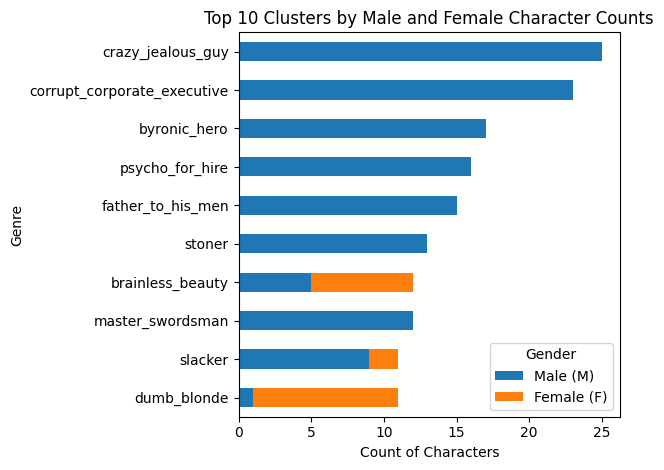

In [ ]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

gender_cluster_counts['Total'] = gender_cluster_counts.sum(axis=1)
top_clusters = gender_cluster_counts.sort_values(by='Total', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top clusters
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Clusters by Male and Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

By taking the most common clusters, we see mainly clusters assigned to males.

<Figure size 1200x800 with 0 Axes>

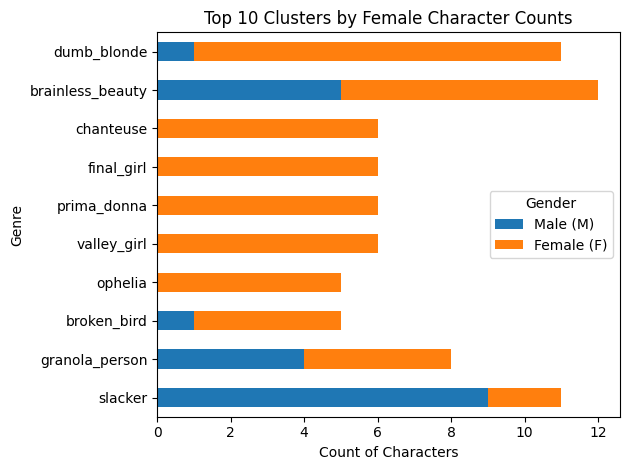

In [ ]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

top_clusters = gender_cluster_counts.sort_values(by='F', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Clusters by Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

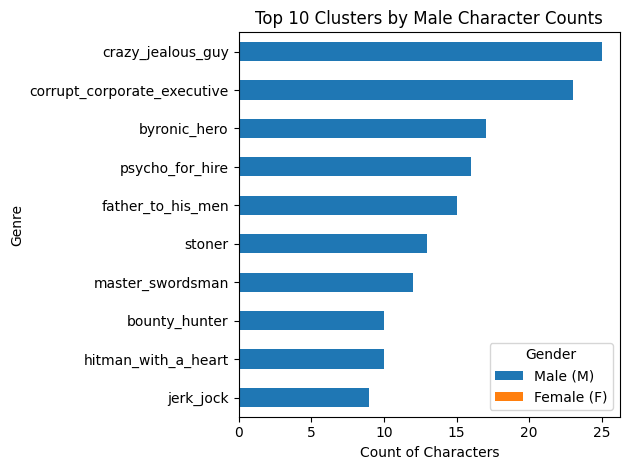

In [ ]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

top_clusters = gender_cluster_counts.sort_values(by='M', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Clusters by Male Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

Just by plotting the top-clusters of each gender we can detect stereotypical adjectives and characterizations such as:

Females:
- dumb
- blonde
- eccentric
- brainless
- beauty


Males:
- warrior
- hero
- hitman

## 2 Plot Analysis

We used the BookNLP library to extract NER and coreference data. Due to the time required to analyze all 43,000 plots, this report focuses on a sample of 500 plots. The final report will include the full dataset and provide an analysis of plots categorized by genre and movie nationality.

### 2.1 Examination of plot summaries

Text size is important in sentiment analysis, as it influences the model's ability to capture sentiment accurately. Tailoring our approach based on text length, such as using segment-based analysis for longer texts or carefully selecting models, can lead to more reliable sentiment results.

count    42303.000000
mean       310.740468
std        318.338286
min          4.000000
25%         87.000000
50%        187.000000
75%        454.000000
max       4929.000000
Name: word_count, dtype: float64


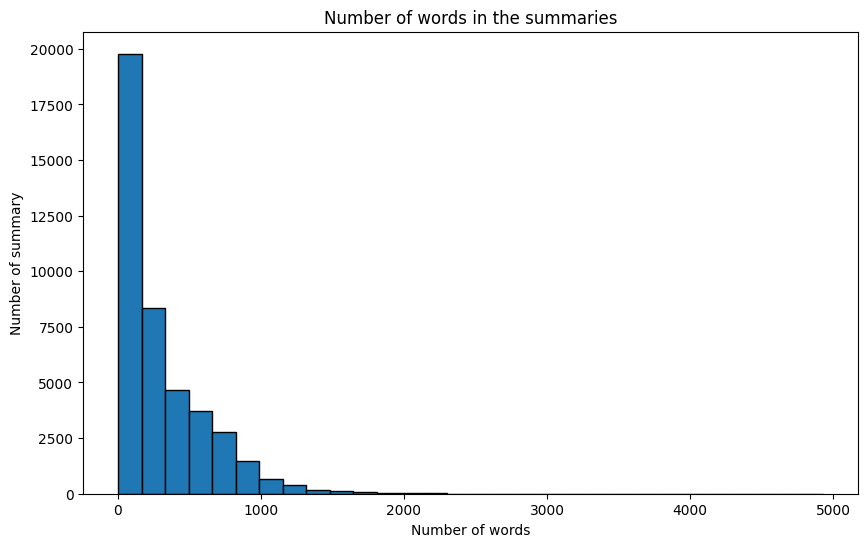

In [ ]:
# Add a new column with the number of words for each summary
df_summaries['word_count'] = df_summaries['summary'].apply(lambda x: len(str(x).split()))

# Calculate the descriptive statistics
plot_summary_stats = df_summaries['word_count'].describe()
print(plot_summary_stats)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_summaries['word_count'], bins=30, edgecolor='black')
plt.title('Number of words in the summaries')
plt.xlabel('Number of words')
plt.ylabel('Number of summary')
plt.show()

It seems like the distribution of the words in summaries is far from uniform, as the median is 187 and the mean is 310. The fact that the mean is so much higher than the median, shows that there are some summaries with a very large size which increase significantly the average size of the plots. This is also obvious by the standard deviation which is 318. This wide variation acorss the size of the plots should be taken into account in our analysis.

### 2.2 Gender Count in Plot
We examined the number of characters in each plot by gender and analyzed the frequency of mentions per character, also categorized by gender.

In [ ]:
processed_path = Path('/content/drive/MyDrive/ADA/data/processed/')
plot_path_list = sorted(list(processed_path.glob('*')))[:500]

In [ ]:
gender_count = []
gender_ratio = []
gender_sum_mention = []
gender_ratio_mention = []

for plot_path in tqdm(plot_path_list):
  data = CharacterDataset(plot_path)
  gender_count.append(data.gender_count)
  gender_ratio.append(data.gender_ratio)
  gender_sum_mention.append(data.gender_sum_mention)
  gender_ratio_mention.append(data.gender_ratio_mention)
  del data
  gc.collect()

100%|██████████| 500/500 [01:41<00:00,  4.93it/s]


In [ ]:
gender_count_df = pd.DataFrame(gender_count)
gender_ratio_df = pd.DataFrame(gender_ratio)
gender_sum_mention_df = pd.DataFrame(gender_sum_mention)
gender_ratio_mention_df = pd.DataFrame(gender_ratio_mention)

In [ ]:
gender_count_df.fillna(0, inplace=True)
gender_ratio_df.fillna(0, inplace=True)
gender_sum_mention_df.fillna(0, inplace=True)
gender_ratio_mention_df.fillna(0, inplace=True)

#### Insights on Gender
- Male characters appear most frequently, with an average count of 2.81 per entry and an average ratio of 0.45, indicating that male characters are more dominant across entries.
- Male character counts have the highest variability (range 1–14), suggesting diverse representation, while female and plural characters tend to appear less frequently and more consistently.

In [ ]:
print("Gender Count Summary Statistics:\n", gender_count_df.describe())
print("\nGender Ratio Summary Statistics:\n", gender_ratio_df.describe())

Gender Count Summary Statistics:
            plural      female       male     unknown
count  500.000000  500.000000  500.00000  500.000000
mean     1.458000    1.488000    2.81600    0.736000
std      1.983963    1.638054    2.59685    1.263922
min      0.000000    0.000000    0.00000    0.000000
25%      0.000000    0.000000    1.00000    0.000000
50%      1.000000    1.000000    2.00000    0.000000
75%      2.000000    2.000000    4.00000    1.000000
max     15.000000   10.000000   14.00000    9.000000

Gender Ratio Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     0.189820    0.235771    0.450046    0.080363
std      0.228186    0.236059    0.294852    0.125965
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.272727    0.000000
50%      0.142857    0.200000    0.458042    0.000000
75%      0.333333    0.385684    0.600000    0.142857
max      1.000000    1

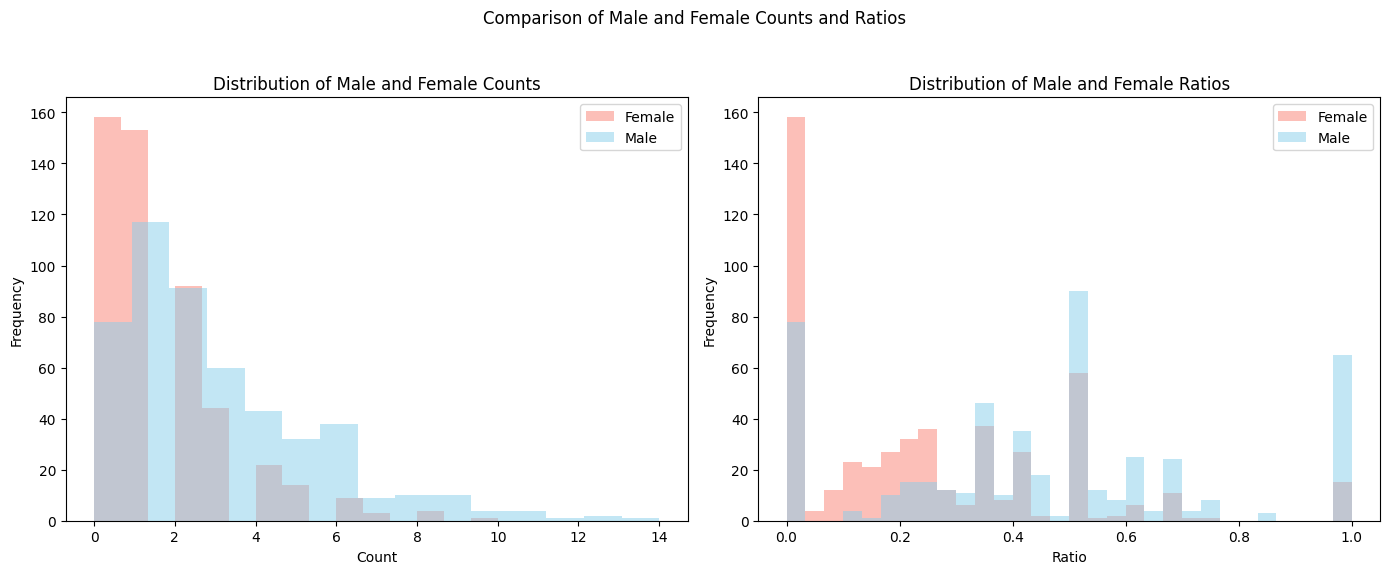

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Counts and Ratios")

# 1. Overlaid Histograms for Counts
axes[0].hist(gender_count_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_count_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Counts")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# 2. Overlaid Histograms for Ratios
axes[1].hist(gender_ratio_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratios")
axes[1].set_xlabel("Ratio")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Insights on Gender Mentions
- Male characters have the highest total (26.42) and average mentions per character (7.37), suggesting a stronger narrative focus on male characters.
- Female characters have lower total and average mentions (11.81 total; 4.96 average), indicating a possible gender disparity in narrative attention.

In [ ]:
print("\nGender Sum Mention Summary Statistics:\n", gender_sum_mention_df.describe())
print("\nGender Ratio Mention Summary Statistics:\n", gender_ratio_mention_df.describe())


Gender Sum Mention Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     5.550000   11.810000   26.426000    1.772000
std      9.674021   19.850895   35.294134    3.239909
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    4.000000    0.000000
50%      2.000000    5.000000   12.000000    0.000000
75%      7.000000   14.000000   36.000000    2.000000
max    116.000000  172.000000  230.000000   26.000000

Gender Ratio Mention Summary Statistics:
            plural      female        male     unknown
count  500.000000  500.000000  500.000000  500.000000
mean     2.054289    4.962940    7.369490    0.936137
std      2.628083    6.216373    7.337663    1.228779
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    3.000000    0.000000
50%      2.000000    3.000000    5.333333    0.000000
75%      3.000000    7.000000    9.762500    2.00000

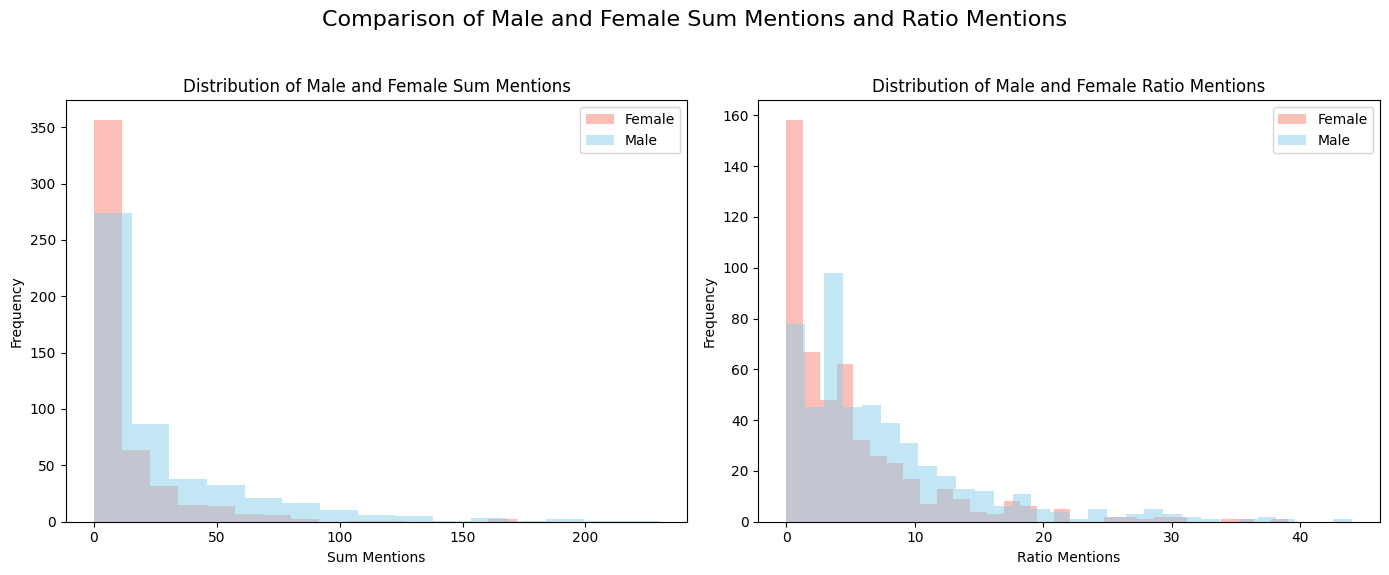

In [ ]:
# Plotting male and female comparisons for Sum Mentions and Ratio Mentions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Sum Mentions and Ratio Mentions", fontsize=16)

# 1. Overlaid Histogram for Sum Mentions
axes[0].hist(gender_sum_mention_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_sum_mention_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Sum Mentions")
axes[0].set_xlabel("Sum Mentions")
axes[0].set_ylabel("Frequency")
axes[0].legend(loc='upper right')

# 2. Overlaid Histogram for Ratio Mentions
axes[1].hist(gender_ratio_mention_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_mention_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratio Mentions")
axes[1].set_xlabel("Ratio Mentions")
axes[1].set_ylabel("Frequency")
axes[1].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 2.3 Related Event Analysis

In [ ]:
female_agent_events = []
male_agent_events = []
female_patient_events = []
male_patient_events = []
female_poss_events = []
male_poss_events = []

for plot_path in tqdm(plot_path_list):
  data = EventDataset(plot_path)
  female_agent_events.extend(data.agent_events['female'])
  male_agent_events.extend(data.agent_events['male'])
  female_patient_events.extend(data.patient_events['female'])
  male_patient_events.extend(data.patient_events['male'])
  female_poss_events.extend(data.poss_events['female'])
  male_poss_events.extend(data.poss_events['male'])
  del data
  gc.collect()

100%|██████████| 500/500 [01:47<00:00,  4.66it/s]


In [ ]:
def show_wordcloud(male_text : str,
                   female_text : str,
                   title : str,
                   max_words : int = 100):
  wordcloud_female = WordCloud(width=400, height=400, background_color='white', colormap='Reds', max_words=max_words).generate(female_text)
  wordcloud_male = WordCloud(width=400, height=400, background_color='white', colormap='Blues', max_words=max_words).generate(male_text)

  # Display the word clouds side by side
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.suptitle(f"{title} Associated with Female and Male Characters", fontsize=16)

  # Female verbs word cloud
  axes[0].imshow(wordcloud_female, interpolation='bilinear')
  axes[0].set_title("Female Characters")
  axes[0].axis('off')

  # Male verbs word cloud
  axes[1].imshow(wordcloud_male, interpolation='bilinear')
  axes[1].set_title("Male Characters")
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()

#### Possessive Words
- With the overlapping words removed, the word cloud analysis of possessive words reveals some thematic associations for female and male characters:

- Female Characters: Words like "pregnancy," "illness," and "stepmother" highlight themes related to relationships, family, and health, suggesting roles centered around personal and familial aspects.
- Male Characters: Words such as "gang," "office," and "music" emphasize social affiliations, activities, and professional roles, pointing to portrayals associated with external, social, and occupational identities.
- These word associations may suggest subtle differences in how male and female characters are depicted, with female characters more often linked to family and personal themes, and male characters to social and professional contexts.

In [ ]:
male_only_poss = set(male_poss_events) - set(female_poss_events)
female_only_poss = set(female_poss_events) - set(male_poss_events)
both_poss = set(male_poss_events) & set(female_poss_events)

In [ ]:
male_poss_text = ' '.join([_ for _ in male_poss_events if _ in male_only_poss])
female_poss_text = ' '.join([_ for _ in female_poss_events if _ in female_only_poss])

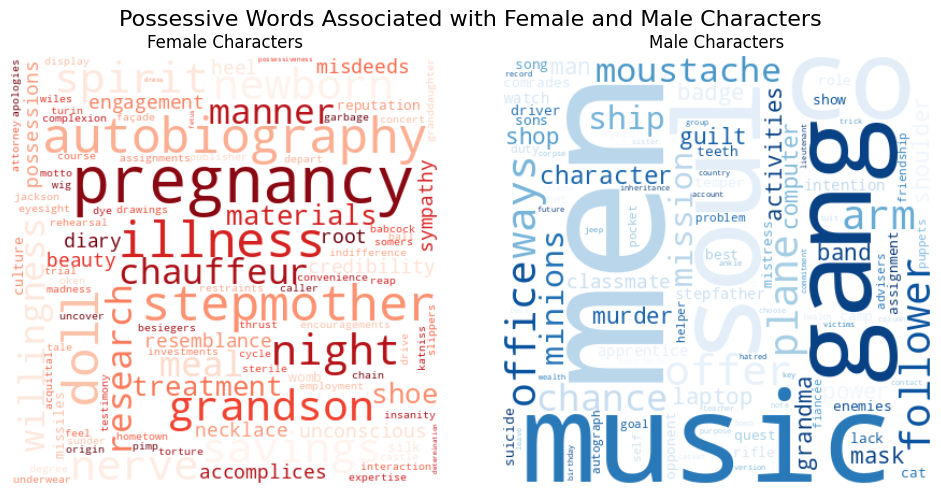

In [ ]:
show_wordcloud(male_poss_text,
               female_poss_text,
               "Possessive Words",
               max_words = 100)

#### Agent Words
- With the overlapping words removed, the word cloud analysis of agent words reveals additional thematic associations for female and male characters:

- Female Characters: Verbs like "unite," "forgive," and "support" suggest themes of collaboration and care, with some words such as "starve" and "sabotage" hinting at struggle or resilience.
- Male Characters: Words like "prepare," "order," and "capture" emphasize command, control, and action, while "challenge" and "murder" suggest confrontation.




In [ ]:
male_only_agent = set(male_agent_events) - set(female_agent_events)
female_only_agent = set(female_agent_events) - set(male_agent_events)
both_agent = set(male_agent_events) & set(female_agent_events)

In [ ]:
male_agent_text = ' '.join([_ for _ in male_agent_events if _ in male_only_agent])
female_agent_text = ' '.join([_ for _ in female_agent_events if _ in female_only_agent])

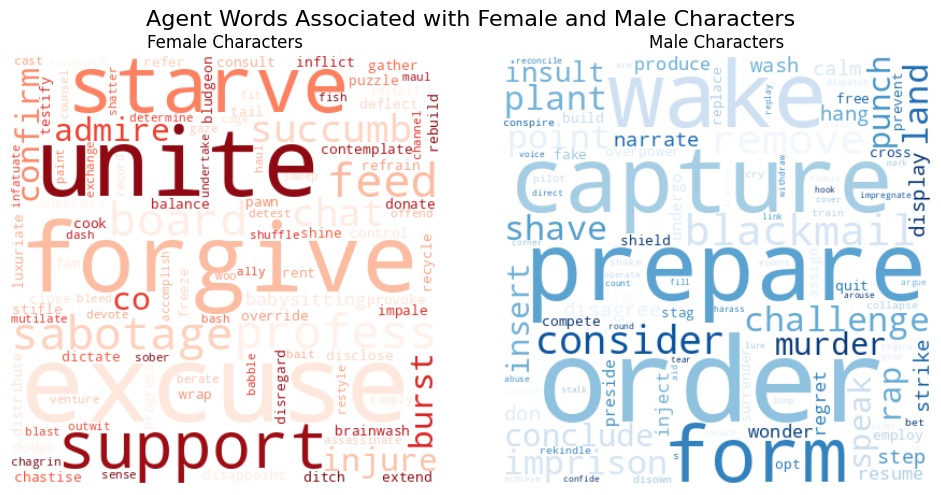

In [ ]:
show_wordcloud(male_agent_text, female_agent_text, "Agent Words")

#### Patient Words
- With the overlapping words removed, the word cloud analysis of patient words reveals further thematic associations for female and male characters:

- Female Characters: Words like "greet," "desert," "whisk," and "abuse" suggest themes of relational experiences, vulnerability, and abandonment, hinting at situations where female characters are acted upon in personal or relational contexts.
- Male Characters: Words such as "injure," "recruit," "fight," and "challenge" indicate themes of confrontation, control, and conflict, where male characters are often on the receiving end of actions tied to aggression or authority.
- These associations reflect subtle differences in portrayal: female characters are frequently linked to relational and vulnerable experiences, while male characters are depicted in contexts of conflict and exertion of power.

In [ ]:
male_only_patient = set(male_patient_events) - set(female_patient_events)
female_only_patient = set(female_patient_events) - set(male_patient_events)
both_patient = set(male_patient_events) & set(female_patient_events)

In [ ]:
male_patient_text = ' '.join([_ for _ in male_patient_events if _ in male_only_patient])
female_patient_text = ' '.join([_ for _ in female_patient_events if _ in female_only_patient])

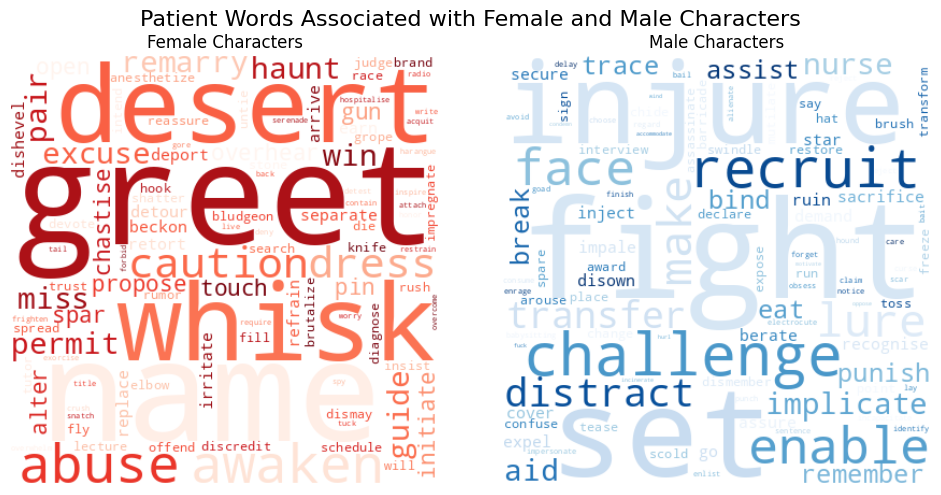

In [ ]:
show_wordcloud(male_patient_text, female_patient_text, "Patient Words")